In [28]:
import lightkurve as lk
import matplotlib.pyplot as plt
from astropy.timeseries import aggregate_downsample
from astropy import units as u

In [2]:
# %matplotlib notebook

In [3]:
TIC = 'TIC 465088681' #lambda sco
search_data0 = lk.search_lightcurve(TIC)

In [4]:
print(search_data0)

SearchResult containing 8 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 12 2019      SPOC     120   465088681      0.0
  1 TESS Sector 12 2019 TESS-SPOC    1800   465088681      0.0
  2 TESS Sector 12 2019       QLP    1800   465088681      0.0
  3 TESS Sector 39 2021      SPOC     120   465088681      0.0
  4 TESS Sector 39 2021 TESS-SPOC     600   465088681      0.0
  5 TESS Sector 39 2021       QLP     600   465088681      0.0
  6 TESS Sector 66 2023      SPOC     120   465088681      0.0
  7 TESS Sector 66 2023       QLP     200   465088681      0.0


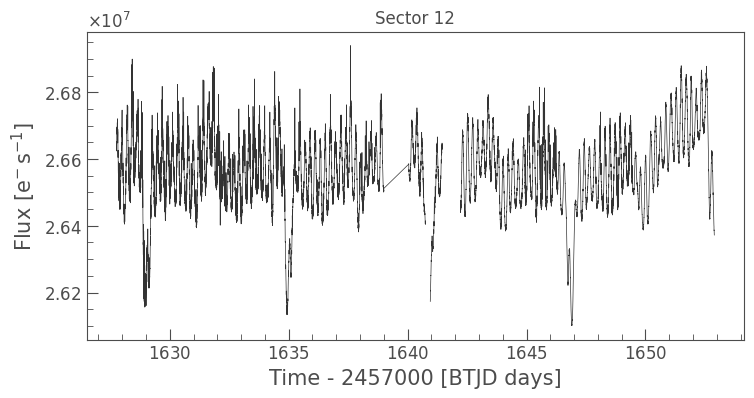

In [16]:
TIC = 'TIC 465088681' #lambda sco
search_data0 = lk.search_lightcurve(TIC)[0]
search_data3 = lk.search_lightcurve(TIC)[3]
search_data6 = lk.search_lightcurve(TIC)[6]
lc1 = search_data0.download()
lc1.plot()
plt.title("Sector 12")
plt.legend().set_visible(False)
plt.savefig("sector12lc_untouchedtitled.png", bbox_inches = 'tight', dpi =600)
plt.show()

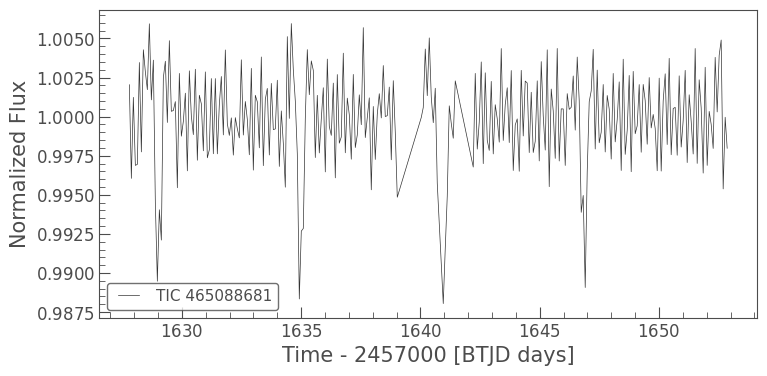

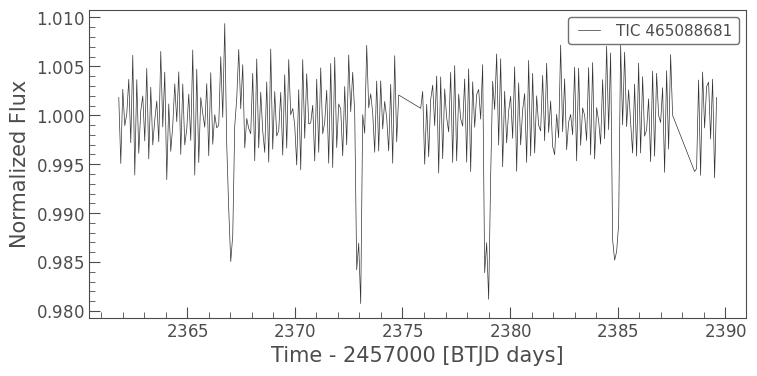

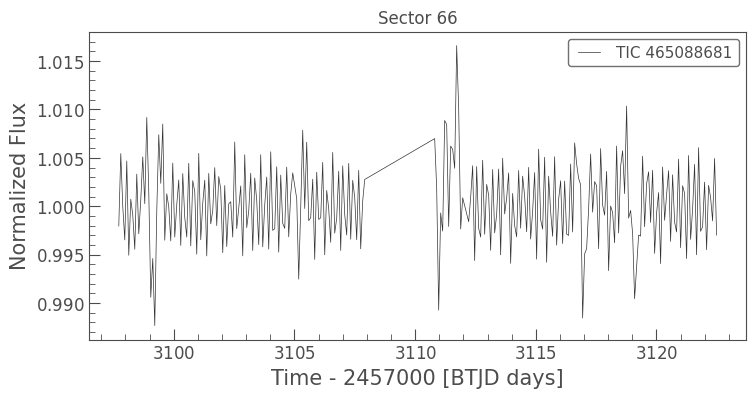

In [26]:
### loading, flattening, and removing outliers from lightcurve (TESS)
TIC = 'TIC 465088681' #lambda sco
search_data0 = lk.search_lightcurve(TIC)[0]
search_data3 = lk.search_lightcurve(TIC)[3]
search_data6 = lk.search_lightcurve(TIC)[6]

lc1 = search_data0.download()
norm_lc1 = lc1.normalize().remove_outliers().flatten(1001, break_tolerance=500)
norm_rem1 = norm_lc1.bin(bins=300).remove_nans()
#need 500 data points to make it work, remove nans removes empty bins, 500 is optimal
lc1 = norm_rem1
lc1.plot()
# plt.title("Sector 12")
# plt.title("Sector 12 Lightcurve")

# lombscargle0 = lc0.to_periodogram(method='lombscargle')
# lombscargle0.plot()
# plt.title("Sector 12 Periodogram")

lc2 = search_data3.download()
norm_lc2 = lc2.normalize().remove_outliers().flatten(1001,break_tolerance=5000)
norm_rem2 = norm_lc2.bin(bins=300).remove_nans()
lc2 = norm_rem2
lc2.plot()
plt.show()

lc3 = search_data6.download()
norm_lc3 = lc3.normalize().remove_outliers().flatten(1001)
norm_rem3 = norm_lc3.bin(bins=300).remove_nans()
lc3 = norm_rem3
lc3.plot()
# plt.legend().set_visible(False)
plt.title("Sector 66")
plt.savefig("sector66lc_titled.png", bbox_inches = 'tight', dpi =600)
# plt.title("Sector 66 Lightcurve")

# lombscargle3 = lc3.to_periodogram(method='lombscargle')
# lombscargle3.plot()
# plt.title("Sector 39 Periodogram")
plt.show()

### defining units PHOEBE will accept, defining fluxes and times
# lc = lc0
# watts_units = u.W / (u.m * u.m)
# fluxes=lc['flux'] * watts_units
# times = lc.time.to_value('btjd')
# sigmas = lc['flux_err'] * watts_units
# b.add_dataset('lc', fluxes=lc['flux']*watts_units, times=lc.time.to_value('btjd'), sigmas = lc['flux_err']*watts_units)

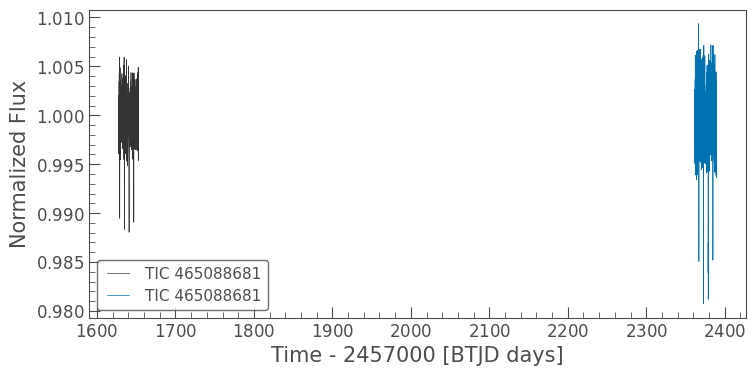

In [5]:
ax = lc1.plot()
lc2.plot(ax=ax)
plt.show()
#why errorbar?
#works for non normalized versions

In [6]:
combined_lc = lc1.append(lc2).append(lc3)

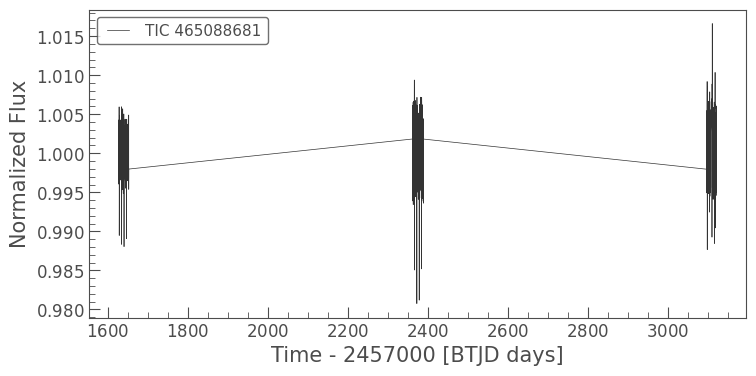

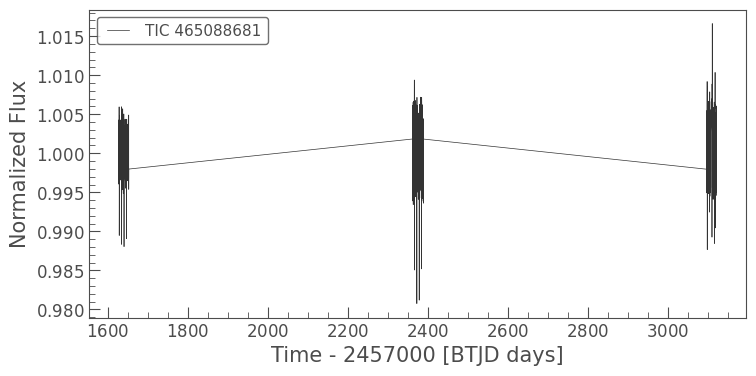

In [8]:
combined_lc.plot()
plt.show()

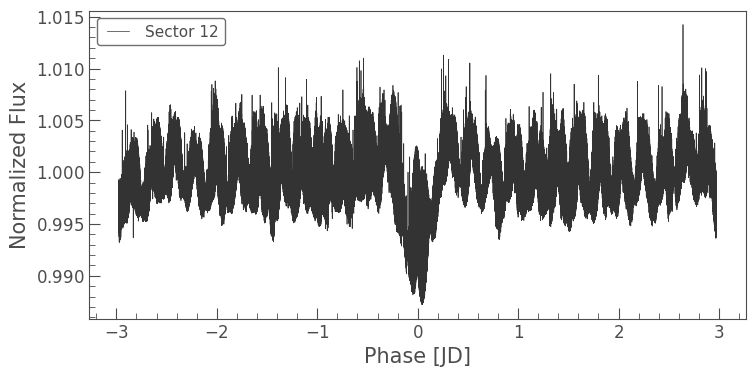

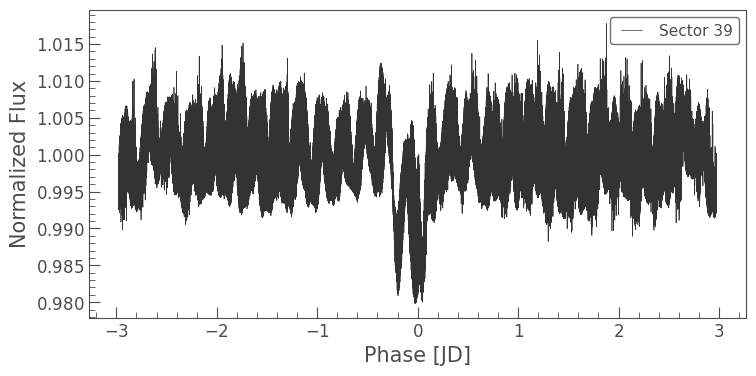

In [25]:
TIC = 'TIC 465088681' #lambda sco
search_data0 = lk.search_lightcurve(TIC)[0]
search_data3 = lk.search_lightcurve(TIC)[3]
search_data6 = lk.search_lightcurve(TIC)[6]

period = 5.9525
t0 = 1629

lc1 = search_data0.download()
lc1 = lc1.normalize().remove_outliers().flatten(1001) #, break_tolerance=500)
lc1 = lc1.fold(period, t0).remove_nans()
# binnedlc1 = lc1.bin(bins=500)

lc2 = search_data3.download()
lc2 = lc2.normalize().remove_outliers().flatten(1001) #,break_tolerance=5000)
lc2 = lc2.fold(period, t0).remove_nans()
# binnedlc2 = lc2.bin(bins=500)
# norm_rem2 = norm_lc2.bin(bins=300).remove_nans()

# binnedlc1.plot(label="Sector 12")
# plt.savefig("foldedbinned_sec12.png", bbox_inches = 'tight', dpi =600)
# binnedlc2.plot(label="Sector 39")
# plt.savefig("foldedbinned_sec39.png", bbox_inches = 'tight', dpi =600)

lc1.plot(label="Sector 12")
plt.savefig("foldedunbinned_sec12.png", bbox_inches = 'tight', dpi =600)
lc2.plot(label="Sector 39")
plt.savefig("foldedunbinned_sec39.png", bbox_inches = 'tight', dpi =600)
plt.show()

/Users/skbowes/anaconda3/lib/python3.10/site-packages/astropy/utils/masked/core.py:827: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(*unmasked, **kwargs)


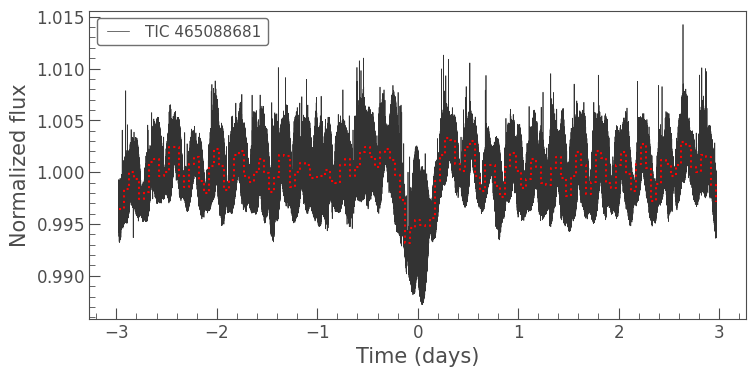

In [88]:
ts_binned = aggregate_downsample(lc1, time_bin_size=0.005 * u.day)
# plt.plot(ts_binned["time_bin_start"], ts_binned['flux'], 'k.', markersize=1)

# plt.plot(ts_folded.time.jd, ts_folded['flux'], 'k.', markersize=1)
lc1.plot()
plt.plot(ts_binned.time_bin_start.jd, ts_binned['flux'], 'r:', drawstyle='steps-post')

plt.xlabel('Time (days)')
plt.ylabel('Normalized flux')

# plt.plot(ts_binned[0][:], ts_binned[0][:],'k.', markersize=1)
plt.savefig("foldedbinned_sec12.png", bbox_inches = 'tight', dpi =600)
plt.show()

In [81]:
ts_binned

time_bin_start,time_bin_size,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,d,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
TimeDelta,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-2.9761141957526704,0.001,0.996881379982384,2.1276247924972674e-05,0.0055305929854512215,297680,277.78317679920343,1425.1883881914302,26277318.0,555.5746459960938,191442.1875,111.2945556640625,26470272.0,564.94921875,0,nan,nan,nan,nan,277.78317679920343,2.4259337806142867e-05,1425.1883881914302,0.00039621046744287014,0.030633412301540375,0.027479205280542374
-2.9751141957526706,0.001,0.9957697086250168,2.1284669601627938e-05,0.005560857709497213,297681,277.7761588281537,1425.1954503871243,26238020.0,555.7243041992188,202824.90625,113.40283203125,26437402.0,565.101318359375,256,nan,nan,nan,nan,277.7761588281537,2.429815322102513e-05,1425.1954503871243,0.0003963305498473346,0.02175193279981613,0.022385630756616592
-2.9741141957526707,0.001,0.997186687967953,2.1256451017662034e-05,0.005506711080670357,296967,277.7889571782555,1425.193346983033,26295634.0,555.16357421875,178981.328125,108.99784088134766,26483418.0,564.5311889648438,0,nan,nan,nan,nan,277.7889571782555,2.4232254872913472e-05,1425.193346983033,0.0003962195769418031,0.03855162486433983,0.04165652394294739
-2.9731141957526708,0.001,0.9977422579950613,2.1292313272614025e-05,0.0055343955755233765,298396,277.7910166725381,1425.1786070065593,26286822.0,555.9265747070312,196766.609375,112.304443359375,26489926.0,565.30712890625,0,nan,nan,nan,nan,277.7910166725381,2.424182639515493e-05,1425.1786070065593,0.00039649978862144053,0.041766662150621414,0.021881168708205223
-2.9721141957526704,0.001,0.9960656665663593,2.1285483017235025e-05,0.005590004380792379,299826,277.7794120786741,1425.1461961201503,26254800.0,555.5000610351562,194588.859375,111.8861312866211,26433538.0,564.873291015625,0,nan,nan,nan,nan,277.7794120786741,2.425307138764765e-05,1425.1461961201503,0.0003963885537814349,0.025735577568411827,-0.0009397839312441647
-2.9711141957526706,0.001,0.9961125727565493,2.126816598285127e-05,0.005491504445672035,295541,277.790999043411,1425.2033159566474,26260642.0,555.619873046875,196006.640625,112.12625885009766,26462096.0,564.9951171875,0,nan,nan,nan,nan,277.790999043411,2.425252205284778e-05,1425.2033159566474,0.00039668171666562557,0.04162334278225899,0.04952503368258476
-2.9701141957526707,0.001,0.9963926395536329,2.1248223564015415e-05,0.005506794434040785,296970,277.7890767054175,1425.1720563124975,26276120.0,554.943115234375,178680.4375,108.92046356201172,26462058.0,564.3069458007812,0,nan,nan,nan,nan,277.7890767054175,2.4222375941462815e-05,1425.1720563124975,0.0003963321214541793,0.038465533405542374,0.039631061255931854
-2.9691141957526708,0.001,0.9971829187153002,2.1286643748366878e-05,0.005534460302442312,298399,277.79675626580064,1425.1807277945018,26273296.0,555.7693481445312,196512.078125,112.21080780029297,26474638.0,565.1471557617188,0,nan,nan,nan,nan,277.79675626580064,2.4229229893535376e-05,1425.1807277945018,0.00039670910337008536,0.049348413944244385,0.02301371656358242


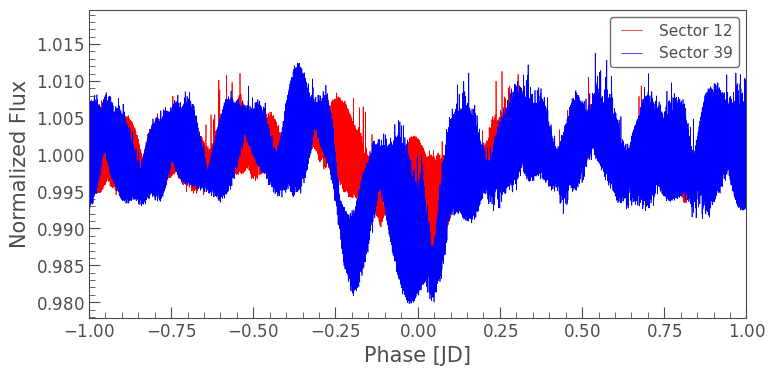

In [17]:
period = 5.9525
t0 = 1629

ax = lc1.fold(period, t0).plot(c='r', label='Sector 12')
lc2.fold(period, t0).plot(ax=ax, c='b', label='Sector 39')
# lc3.fold(period, t0).plot(ax=ax, c='k', label='Sector 66')
#combined_lc.fold(period, t0).plot(ax=ax, c='g', label='Combined')
plt.xlim(-1, 1)
plt.show()

In [5]:
TIC = 'TIC 465088681' #lambda sco
search_data = lk.search_lightcurve(TIC)
lc = search_data.download_all()
stlc = lk.LightCurveCollection(lc).stitch()

/Users/skbowes/anaconda3/lib/python3.10/site-packages/lightkurve/collections.py:213: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_bkg', 'sap_bkg_err', 'sap_flux'}
  warnings.warn(


In [6]:
stlc

time,flux,flux_err,cadenceno,quality
,,,,
Time,float32,float64,int32,int32
1624.9604329538724,———,———,286200,110000000000000
1624.9618218915302,———,———,286201,110000000000000
1624.963210829189,———,———,286202,110000000000000
1624.9645997668472,———,———,286203,110000000000000
1624.965988704506,———,———,286204,110000000000000
1624.9673776421641,———,———,286205,110000000000000
1624.9687665798228,———,———,286206,110000000000000
1624.970155517481,———,———,286207,110000000000000


<Figure size 640x480 with 0 Axes>

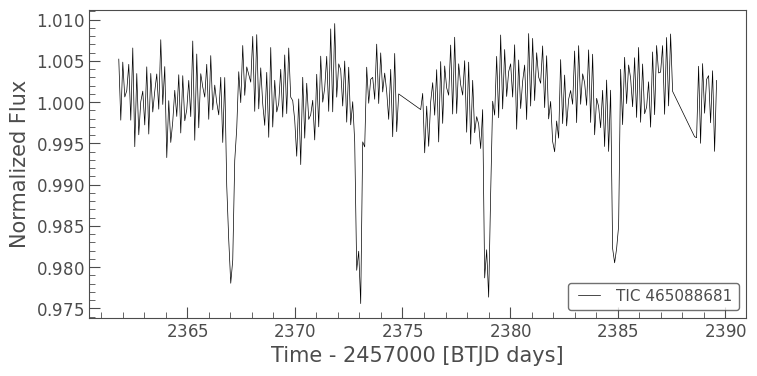

In [21]:
# lc3.fold(period = 5.952).plot()
# lc3.fold(period = 18).plot()
lc3.plot(color = 'black')
# legend.remove()
plt.savefig("lamscolightkurve.png", bbox_inches = 'tight', dpi =600)
plt.show()

In [37]:
pg = lc3.to_periodogram()

In [66]:
# Remove the signals associated with the 50 highest peaks
newlc = lc3.copy()
for i in range(10):
    pg = newlc.to_periodogram()
    model = pg.model(time=newlc.time, frequency=pg.frequency_at_max_power)
    newlc.flux = newlc.flux / model.flux

# Plot the new light curve on top of the original one
# ax = lc3.plot(alpha=.5, label='Original')
# newlc.plot(ax=ax, label='New')

In [67]:
ax = lc3.plot(alpha=.5, label='Original')
# lc3.plot(alpha=.5, label='Original')
newlc.plot(ax=ax, label='New')

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

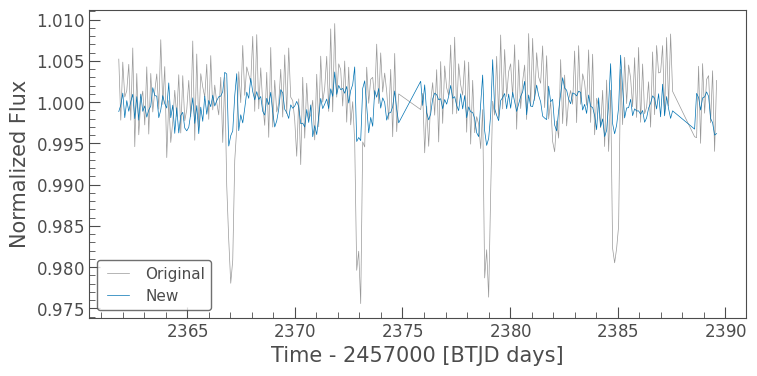

In [68]:
plt.show()

In [10]:
lc0.fold(period = 5.952).plot()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

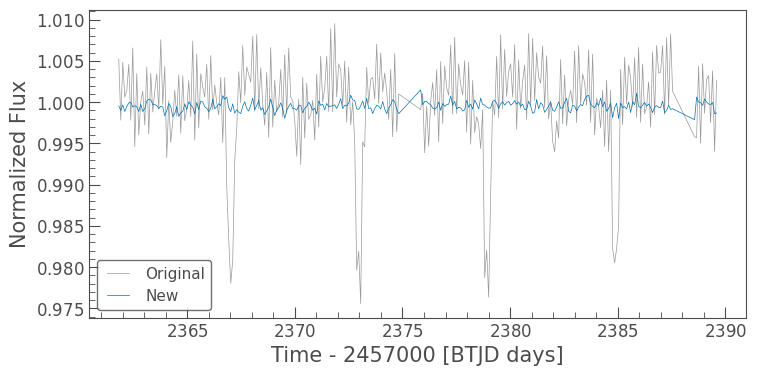

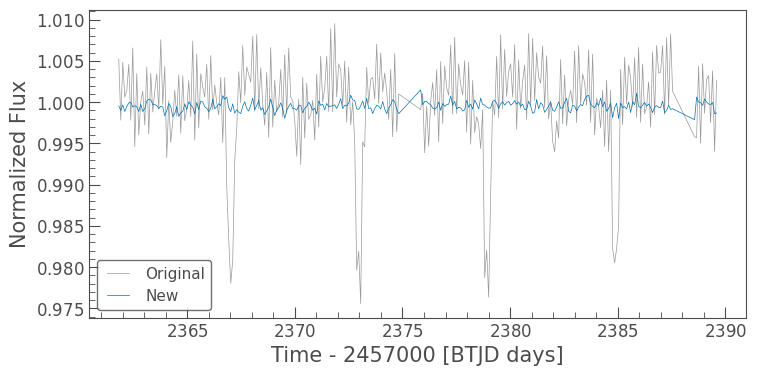

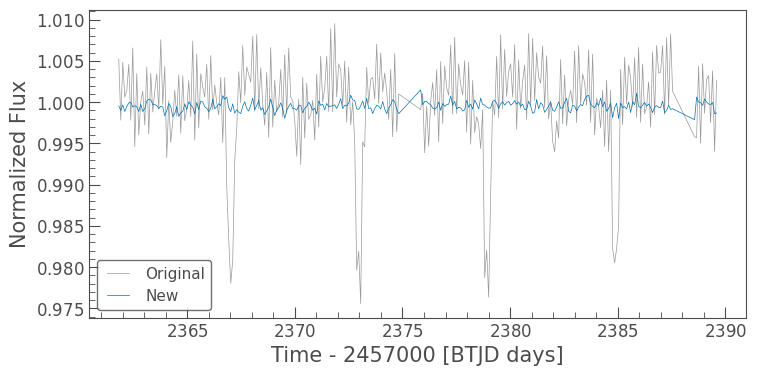

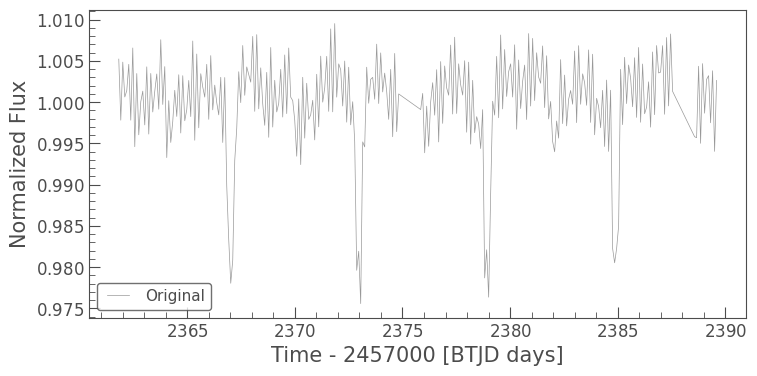

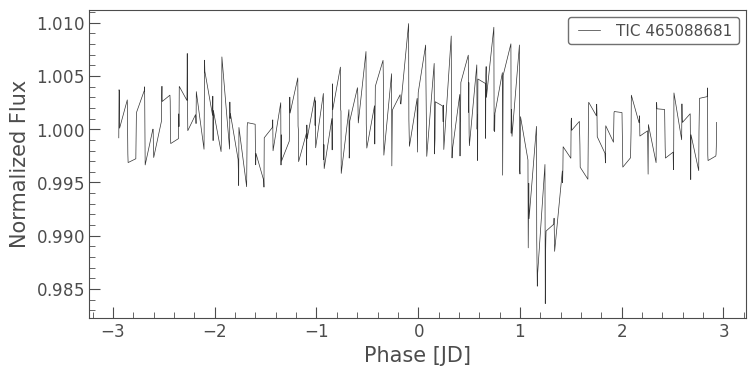

In [11]:
plt.show()